In [1]:
import seaborn as sns
import pandas as pd
from constants import train_trials
import matplotlib.pyplot as plt
import itertools

In [2]:
def load_predictions(ticker, latency: int =None, n_states: int =None):
    df = pd.read_csv(f'../predictions/{ticker}/predictions.csv')
    if latency:
        df = df[df['latency'] == latency]
    if n_states:
        df = df[df['n_states'] == n_states]
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values(['n_states', 'latency', 'date'])
    return df

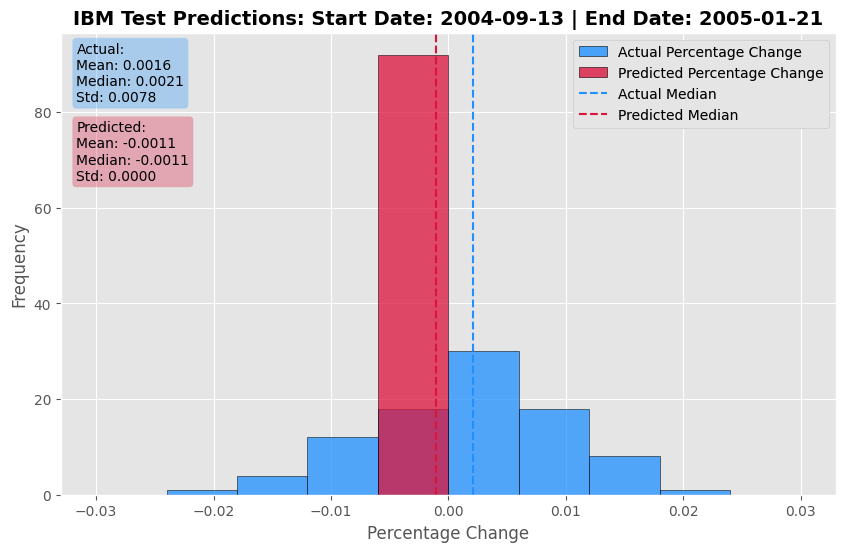

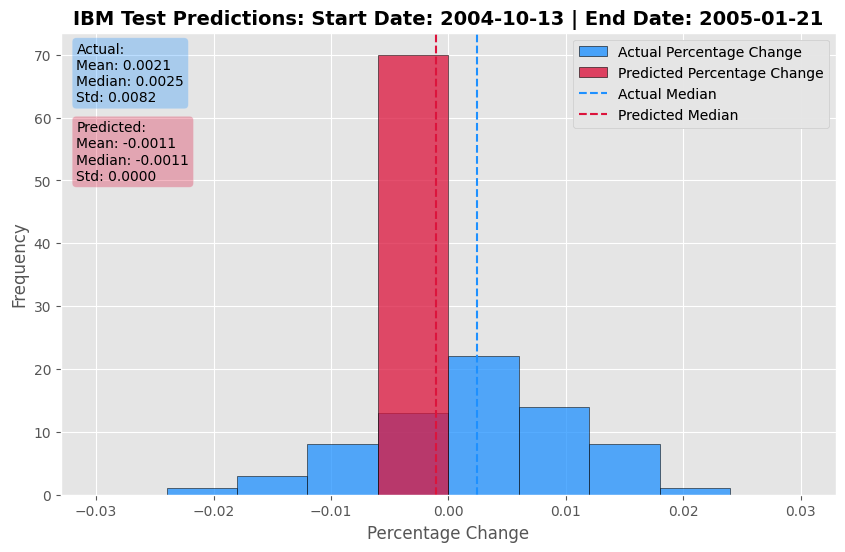

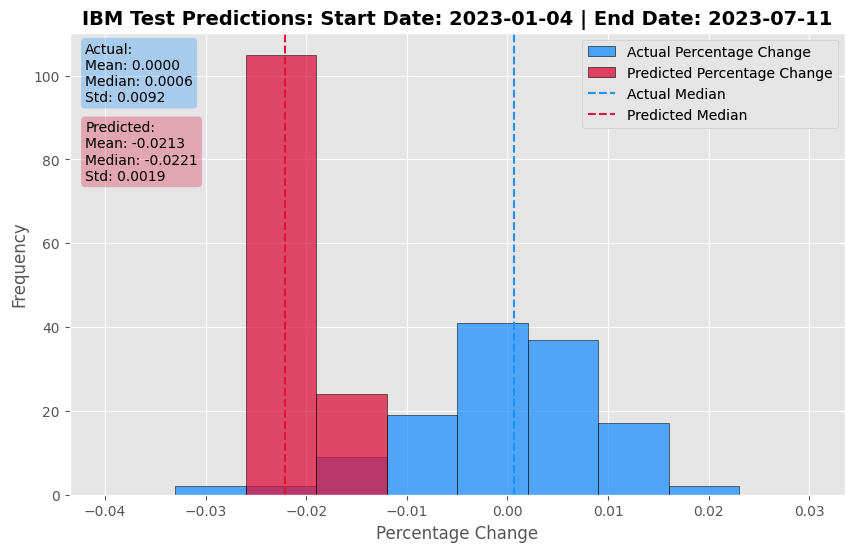

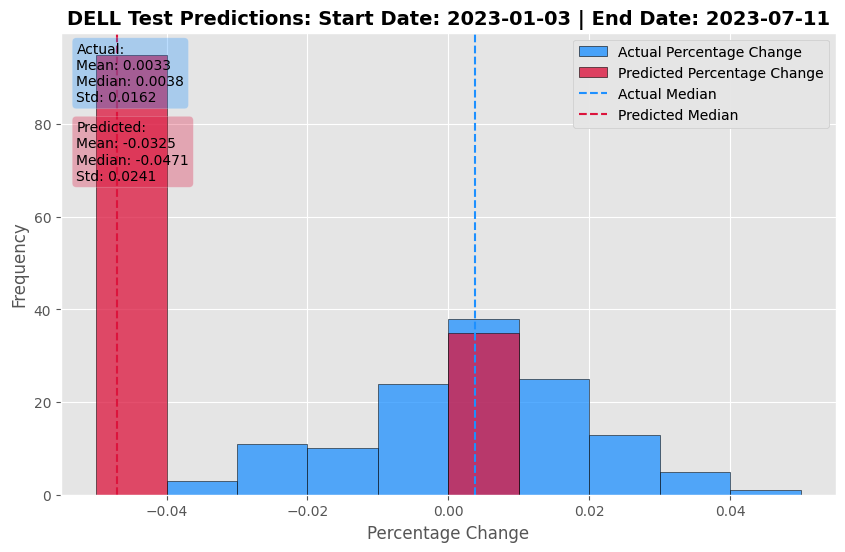

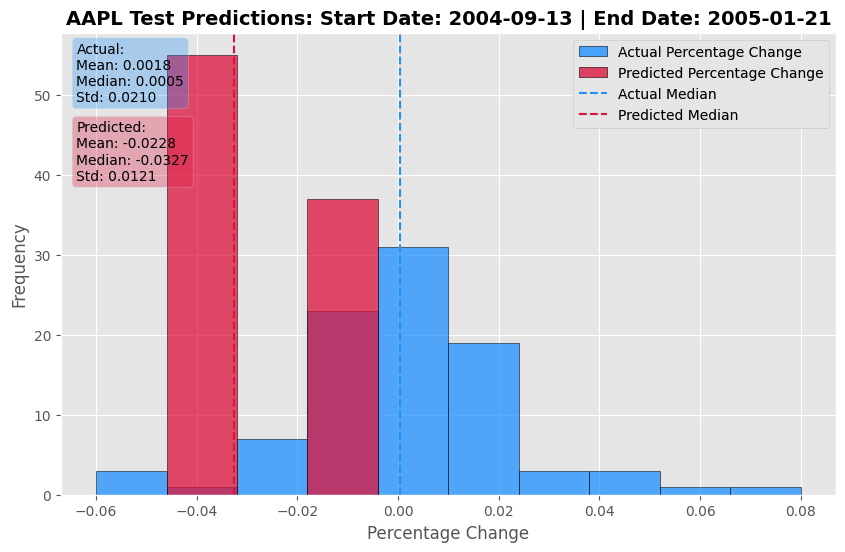

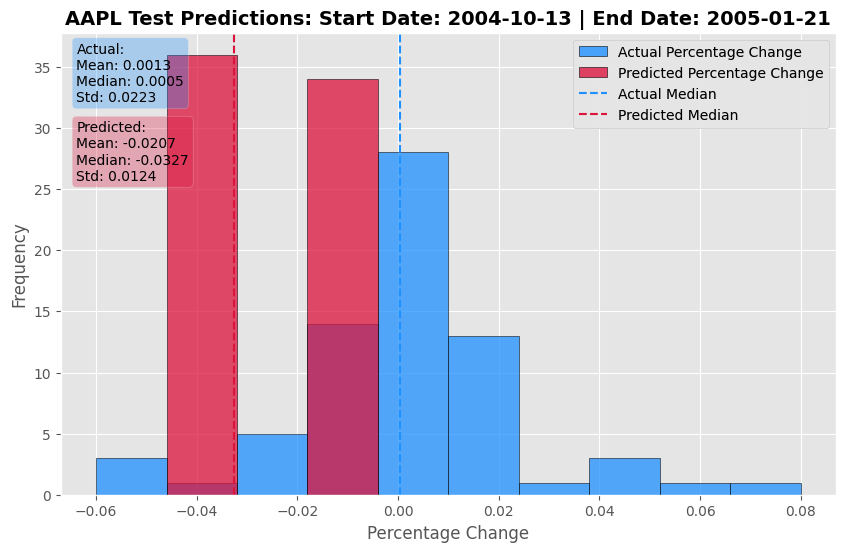

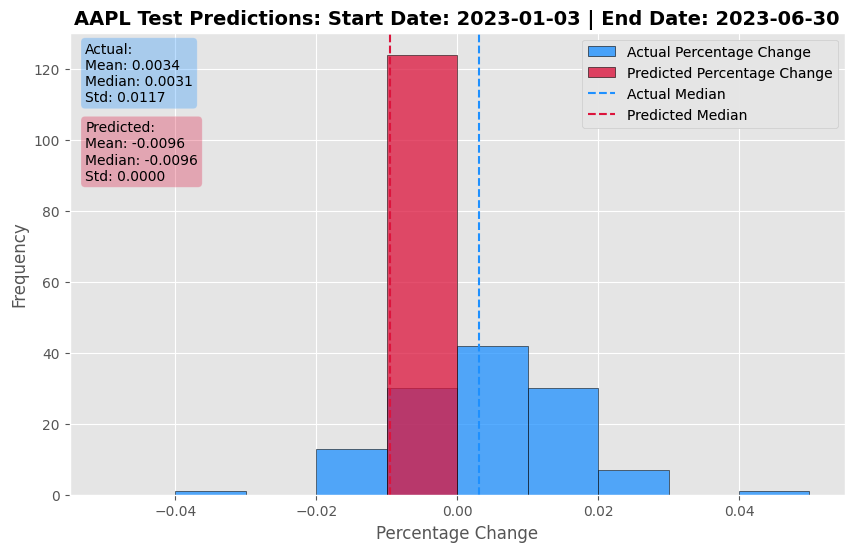

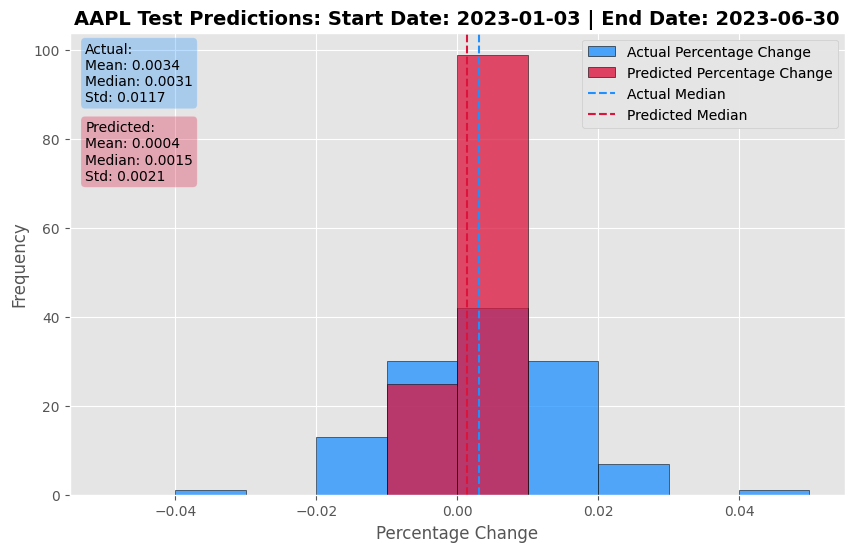

In [3]:
plt.style.use('ggplot')
for ticker in set(train_trials.keys()):
    preds = load_predictions(ticker, latency=10, n_states=4)
    for experiment_id in preds.experiment_id.unique():
        sub_df = preds[preds.experiment_id == experiment_id]

        plt.figure(figsize=(10, 6))
        rng = (round(sub_df.percentage_change.min()-0.01, 2), round(sub_df.percentage_change.max()+0.01, 2))

        plt.hist(sub_df.percentage_change, alpha=0.75, label='Actual Percentage Change', bins=10, range=rng, color='dodgerblue', edgecolor='black')
        plt.hist(sub_df.predicted_percentage_change, alpha=0.75, label='Predicted Percentage Change', bins=10, range=rng, color='crimson', edgecolor='black')

        # Add median lines
        plt.axvline(sub_df.percentage_change.median(), color='dodgerblue', linestyle='--', label='Actual Median')
        plt.axvline(sub_df.predicted_percentage_change.median(), color='crimson', linestyle='--', label='Predicted Median')

        legend = plt.legend(loc='upper right')
        plt.gca().add_artist(legend)

        stats_actual = (f'Actual:\nMean: {sub_df.percentage_change.mean():.4f}\nMedian: {sub_df.percentage_change.median():.4f}\nStd: {sub_df.percentage_change.std():.4f}')
        stats_predicted = (f'Predicted:\nMean: {sub_df.predicted_percentage_change.mean():.4f}\nMedian: {sub_df.predicted_percentage_change.median():.4f}\nStd: {sub_df.predicted_percentage_change.std():.4f}')

        
        text_y_position = 0.98
        plt.text(0.02, text_y_position, stats_actual, transform=plt.gca().transAxes, fontsize=10, 
                 verticalalignment='top', bbox=dict(boxstyle='round', facecolor='dodgerblue', alpha=0.3))
        plt.text(0.02, text_y_position - 0.17, stats_predicted, transform=plt.gca().transAxes, fontsize=10, 
                 verticalalignment='top', bbox=dict(boxstyle='round', facecolor='crimson', alpha=0.3))

        plt.title(f'{ticker} Test Predictions: Start Date: {sub_df.date.min().date()} | End Date: {sub_df.date.max().date()}', fontsize=14, fontweight='bold')
        plt.xlabel('Percentage Change', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)

        plt.show()
        plt.close()

In [8]:
def plot_predictions(title, desired_latency=None, desired_n_states=None):
    line_style = '-'
    if desired_latency and desired_n_states:
        colors = ["crimson"]
    elif desired_latency:
        colors = ['red', 'gold', 'mediumseagreen', 'violet', 'brown']
    else:
        colors = ['red', 'gold', 'mediumseagreen', 'violet']
    color_iter = itertools.cycle(colors)
    
    # Loop over each unique ticker in the dataset
    for ticker in set(train_trials.keys()):
        preds = load_predictions(ticker, n_states=desired_n_states, latency=desired_latency)
        actual_color = 'dodgerblue'  # Keeping the actual change color consistent

        # Loop over each unique experiment ID within the filtered predictions
        for experiment_id in preds.experiment_id.unique():
            sub_df = preds[preds.experiment_id == experiment_id]

            # Plot different latency predictions with the same style but different colors
            varying_latencies = len(sub_df.latency.unique()) > 1
            varying_n_states = len(sub_df.n_states.unique()) > 1
            if (not varying_latencies and desired_latency is None) or (not varying_n_states and desired_n_states is None):
                continue
            
            plt.figure(figsize=(10, 6))
            
            # Filter for the actual data based on the first latency and n_states value
            sub_df_actual = sub_df[(sub_df.latency == sub_df.latency.iloc[0]) & (sub_df.n_states == sub_df.n_states.iloc[0])]
            if not sub_df_actual.empty:
                plt.plot(sub_df_actual.date, sub_df_actual.percentage_change, label='Actual Percentage Change', color=actual_color, linestyle='-', linewidth=2, marker=None)  # No marker for actual
            
            for latency in sub_df.latency.unique():
                for n_states in sub_df.n_states.unique():
                    sub_df_filtered = sub_df[(sub_df.latency == latency) & (sub_df.n_states == n_states)]
                    if varying_latencies and varying_n_states:
                        label = f'Predicted Percentage Change (latency={latency}, n_states={n_states})'
                    elif varying_latencies:
                        label = f'Predicted Percentage Change (latency={latency})'
                    elif varying_n_states:
                        label = f'Predicted Percentage Change (n_states={n_states})'
                    else:
                        label = f'Predicted Percentage Change'
                    if not sub_df_filtered.empty:
                        plt.plot(sub_df_filtered.date, sub_df_filtered.predicted_percentage_change, label=label, 
                        color=next(color_iter), linestyle=line_style, marker='o', markersize=2)
            plt.legend(loc='upper right')
            plt.title(f'{ticker} {title}', fontsize=14, fontweight='bold')
            plt.xlabel('Date', fontsize=12)
            plt.ylabel('Percentage Change', fontsize=12)
            plt.xticks(rotation=30)
            plt.show()
            plt.close()

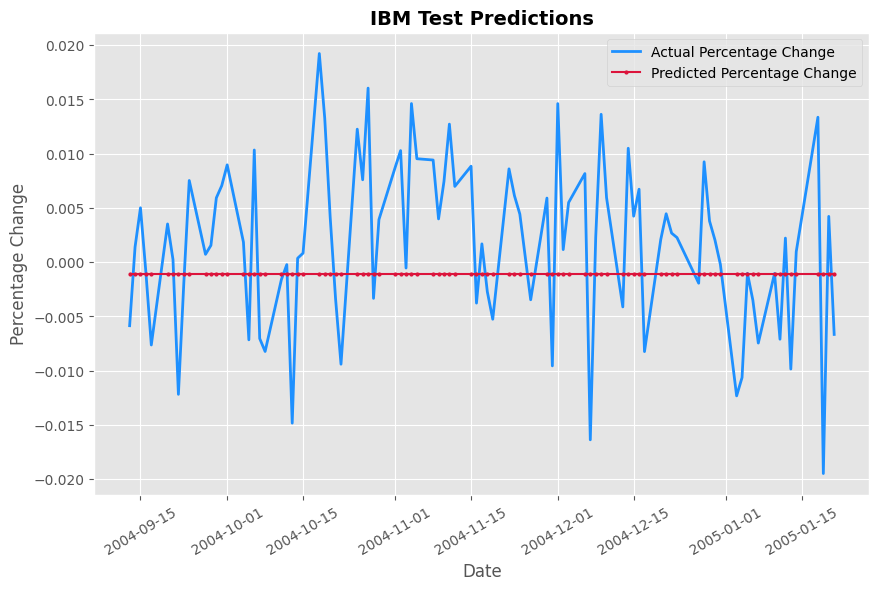

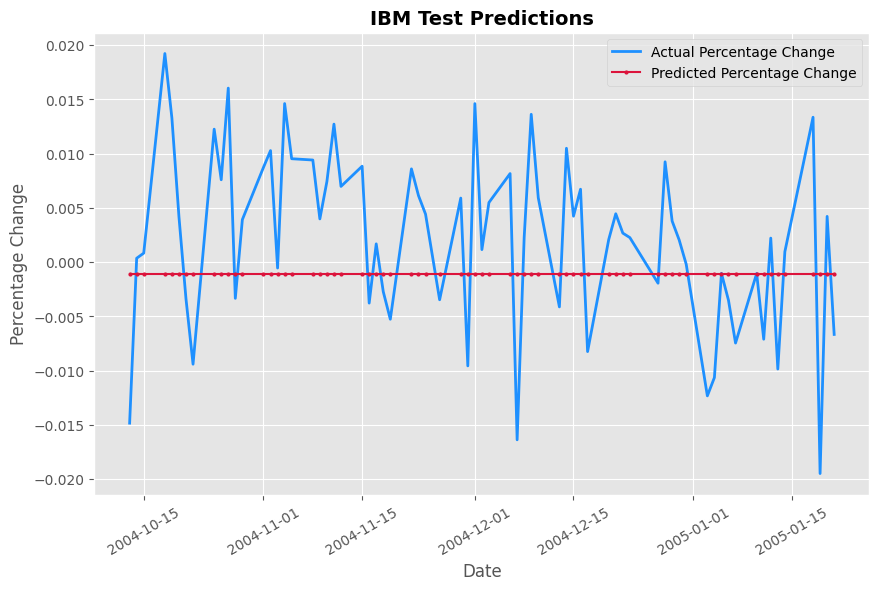

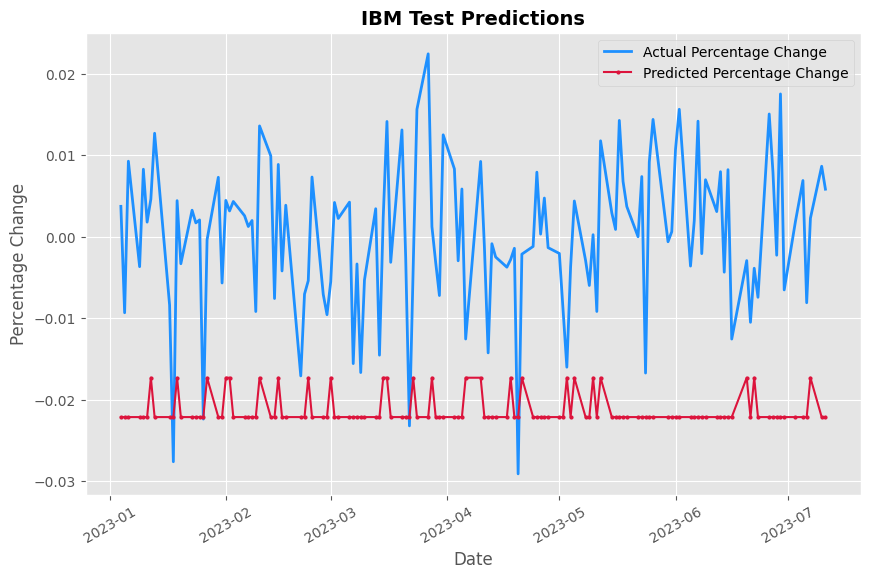

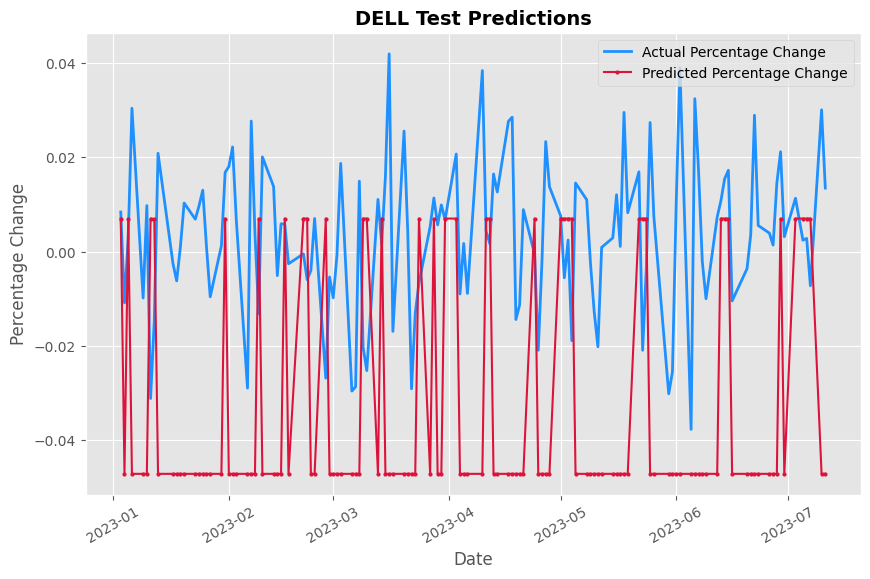

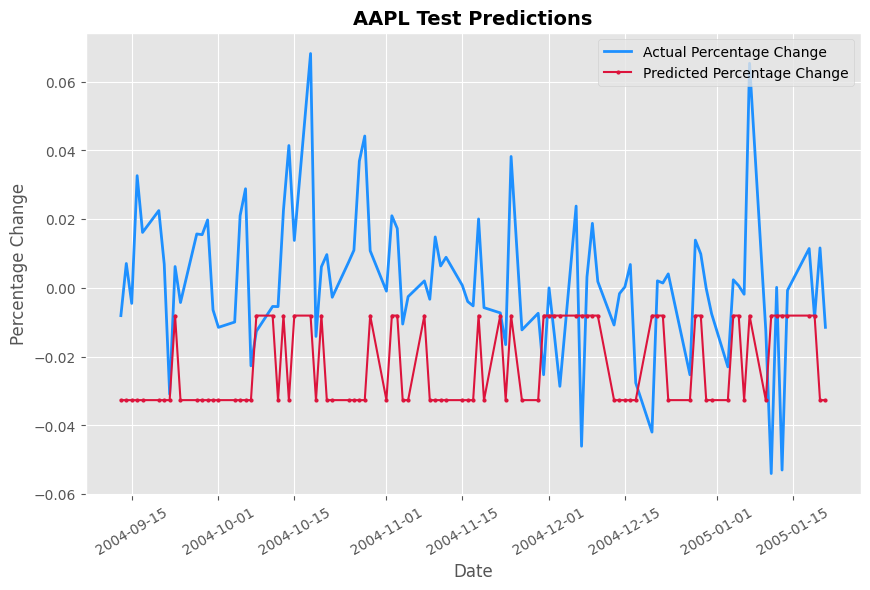

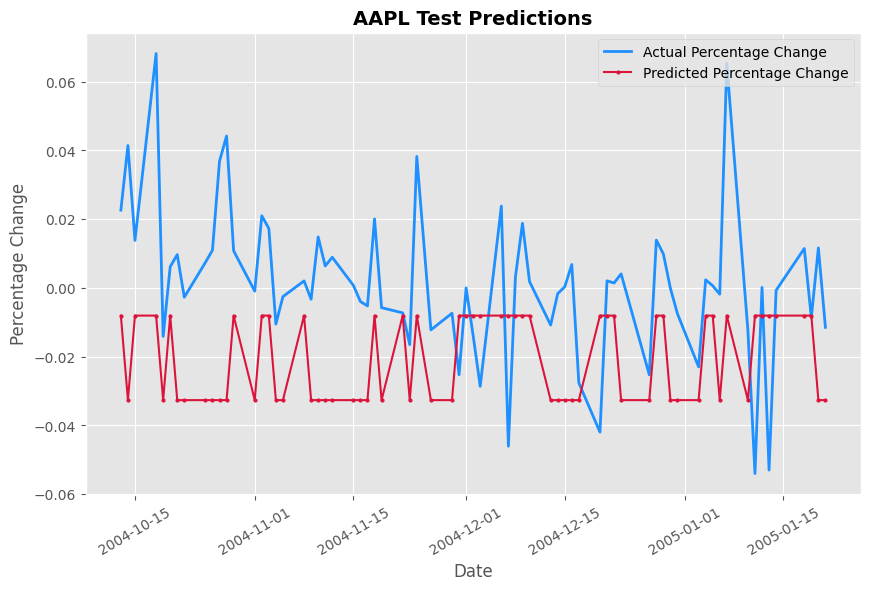

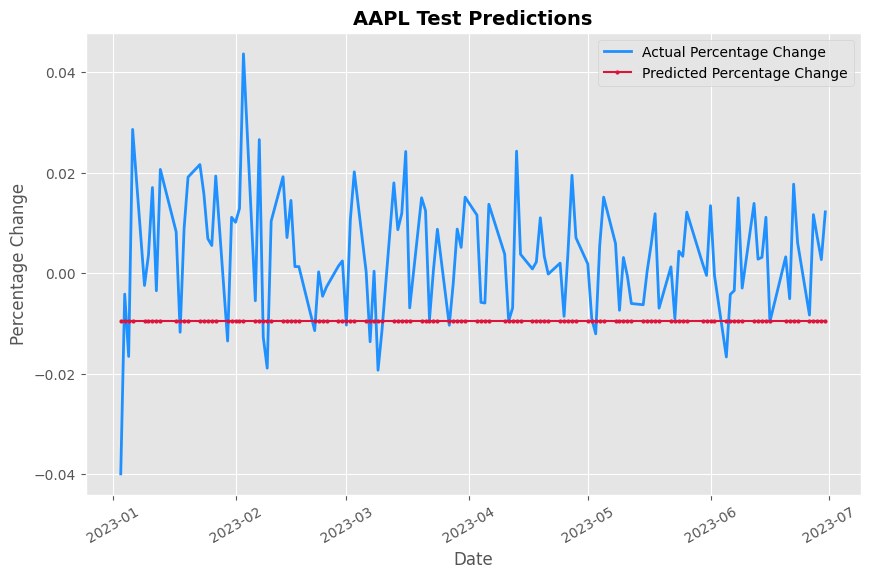

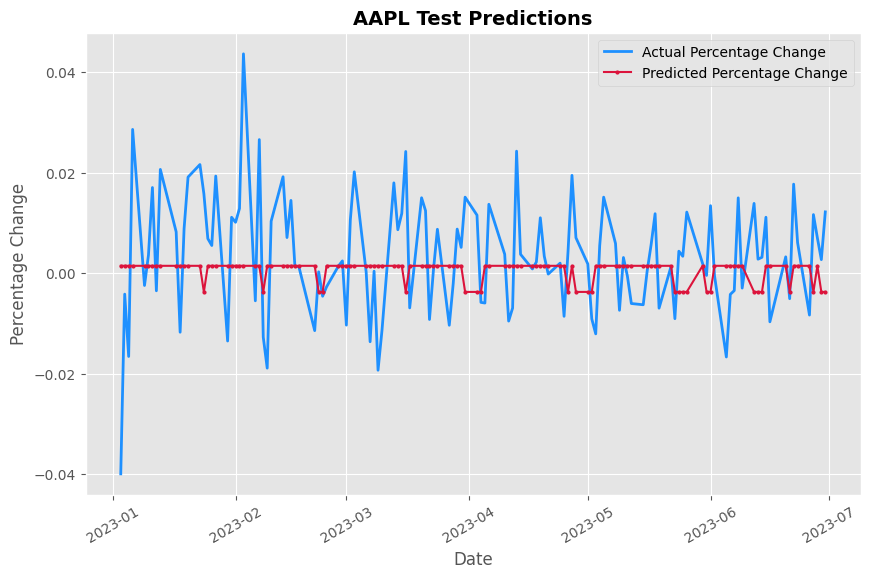

In [9]:
plot_predictions(desired_latency=10, desired_n_states=4, title="Test Predictions")

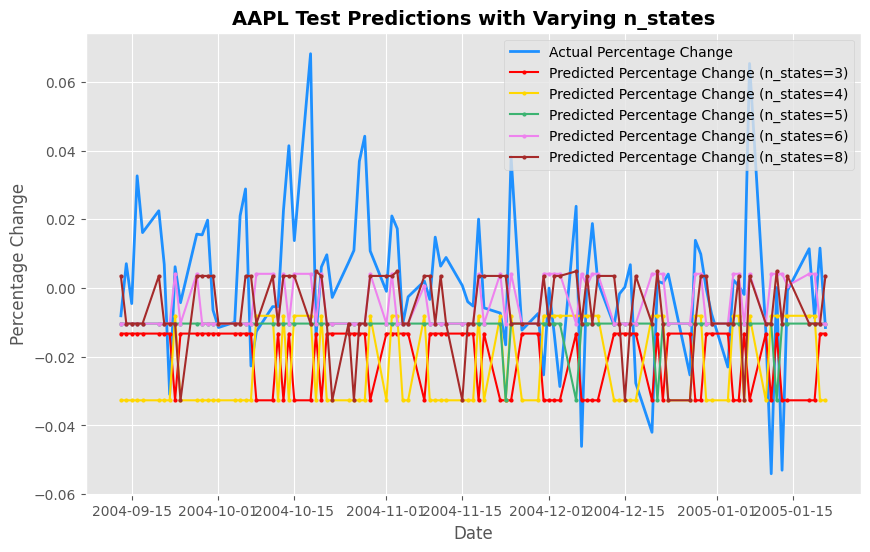

In [36]:
plot_predictions(desired_latency=10, title="Test Predictions with Varying n_states")

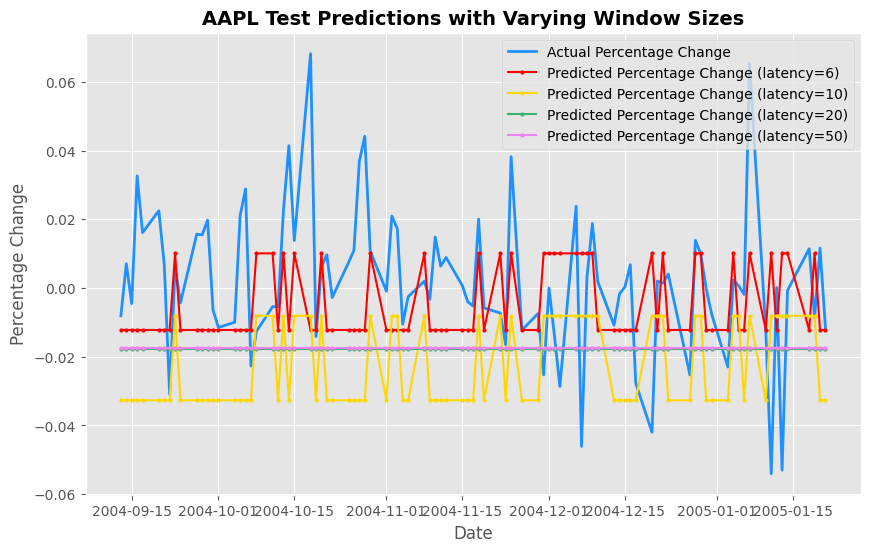

In [37]:
plot_predictions(desired_n_states=4, title="Test Predictions with Varying Window Sizes")